# 1. 이미지 저장

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

heat = pd.read_csv("train_heat.csv", index_col=0)
heat.columns = heat.columns.str.replace("train_heat.", "", regex=False)
heat.head()

,tm,branch_id,ta,wd,ws,rn_day,rn_hr1,hm,si,ta_chi,heat_demand
1,2021010101,A,-10.1,78.3,0.5,0.0,0.0,68.2,-99.0,-8.2,281
2,2021010102,A,-10.2,71.9,0.6,0.0,0.0,69.9,-99.0,-8.6,262
3,2021010103,A,-10.0,360.0,0.0,0.0,0.0,69.2,-99.0,-8.8,266
4,2021010104,A,-9.3,155.9,0.5,0.0,0.0,65.0,-99.0,-8.9,285
5,2021010105,A,-9.0,74.3,1.9,0.0,0.0,63.5,-99.0,-9.2,283


In [2]:
# 날짜 데이터를 데이트타임으로 변경
heat['tm'] = pd.to_datetime(heat['tm'].astype(str), format="%Y%m%d%H")

heat['year'] = heat['tm'].dt.year
heat['month'] = heat['tm'].dt.month
heat['day'] = heat['tm'].dt.day
heat['hour'] = heat['tm'].dt.hour

In [3]:
heat = heat.replace(-99, np.nan)
heat = heat.dropna(subset=['heat_demand'])


In [4]:
# 브랜치·월·시간별 평균 열수요 (라인플롯)
import os

# 저장 폴더 생성 (없는 경우)
save_dir = "images"
os.makedirs(save_dir, exist_ok=True)

for b in heat.branch_id.unique():
    df = heat[heat['branch_id'] == b]
    pivot = df.pivot_table(index='hour', columns='month', values='heat_demand', aggfunc='mean')

    plt.figure(figsize=(10,4))
    for m in pivot.columns:
        plt.plot(pivot.index, pivot[m], label=f'Month {m}')

    plt.title(f'Branch {b} - Average heat demand by time of month')
    plt.xlabel('Hour')
    plt.ylabel('Heat Demand')
    # plt.legend()
    plt.tight_layout()  # 여백 자동 조정
    plt.ylim(0, 700)

    # 파일명 생성 및 저장
    filename = f"{b}-1.png"
    filepath = os.path.join(save_dir, filename)
    plt.savefig(filepath, dpi=300)  # 고해상도로 저장
    plt.close()  # 메모리 누수 방지를 위해 그림 객체 닫기

    print(f"저장 완료: {filepath}")


저장 완료: images/A-1.png
저장 완료: images/B-1.png
저장 완료: images/C-1.png
저장 완료: images/D-1.png
저장 완료: images/E-1.png
저장 완료: images/F-1.png
저장 완료: images/G-1.png
저장 완료: images/H-1.png
저장 완료: images/I-1.png
저장 완료: images/J-1.png
저장 완료: images/K-1.png
저장 완료: images/L-1.png
저장 완료: images/M-1.png
저장 완료: images/N-1.png
저장 완료: images/O-1.png
저장 완료: images/P-1.png
저장 완료: images/Q-1.png
저장 완료: images/R-1.png
저장 완료: images/S-1.png


In [5]:
# 히트맵

for branch in heat.branch_id.unique():
    branch_data = heat[heat['branch_id'] == branch]

    # 월별 평균 열수요 계산
    pivot = branch_data.pivot_table(index='hour', columns='month', values='heat_demand', aggfunc='mean')

    # 그래프 생성
    plt.figure(figsize=(10, 4))
    sns.heatmap(pivot, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Heat Demand'})
    plt.title(f'Branch {branch} - Monthly Heat Demand by Hour')
    plt.xlabel('Month')
    plt.ylabel('Hour')
    plt.tight_layout()

    # 파일로 저장
    filename = f"{branch}-2.png"
    filepath = os.path.join(save_dir, filename)
    plt.savefig(filepath, dpi=300)
    plt.close()

    print(f"저장 완료: {filepath}")


저장 완료: images/A-2.png
저장 완료: images/B-2.png
저장 완료: images/C-2.png
저장 완료: images/D-2.png
저장 완료: images/E-2.png
저장 완료: images/F-2.png
저장 완료: images/G-2.png
저장 완료: images/H-2.png
저장 완료: images/I-2.png
저장 완료: images/J-2.png
저장 완료: images/K-2.png
저장 완료: images/L-2.png
저장 완료: images/M-2.png
저장 완료: images/N-2.png
저장 완료: images/O-2.png
저장 완료: images/P-2.png
저장 완료: images/Q-2.png
저장 완료: images/R-2.png
저장 완료: images/S-2.png


In [6]:
# 로그 변환 후 브랜치 일별 평균 열수요 (라인플롯)

for b in heat.branch_id.unique():
    branch_data = heat[heat['branch_id'] == b].copy()
    branch_data['log_heat_demand'] = np.log1p(branch_data['heat_demand'])

    # NaN 제거
    branch_data = branch_data.dropna(subset=['log_heat_demand', 'tm'])

    # 연-월-일 단위로 그룹핑 (tm이 datetime64 타입이어야 함)
    branch_data['date'] = branch_data['tm'].dt.date
    daily_avg = branch_data.groupby('date')['log_heat_demand'].mean()

    # x축에 날짜를 그대로 사용
    plt.figure(figsize=(14, 6))
    plt.plot(daily_avg.index, daily_avg.values, color='blue')
    plt.title(f'Branch {b} - Log Heat Demand by Date (Daily Average)')
    plt.ylim(0, 7)
    plt.tight_layout()

    filename = f'{b}-3.png'
    filepath = os.path.join(save_dir, filename)
    plt.savefig(filepath, dpi=300)
    plt.close()

    print(f"저장 완료: {filepath}")


저장 완료: images/A-3.png
저장 완료: images/B-3.png
저장 완료: images/C-3.png
저장 완료: images/D-3.png
저장 완료: images/E-3.png
저장 완료: images/F-3.png
저장 완료: images/G-3.png
저장 완료: images/H-3.png
저장 완료: images/I-3.png
저장 완료: images/J-3.png
저장 완료: images/K-3.png
저장 완료: images/L-3.png
저장 완료: images/M-3.png
저장 완료: images/N-3.png
저장 완료: images/O-3.png
저장 완료: images/P-3.png
저장 완료: images/Q-3.png
저장 완료: images/R-3.png
저장 완료: images/S-3.png


In [4]:
import os

# 2. 풍향 각도를 radians → cos/sin 변환 (원형보간 대비 시각화용, 생략 가능)
def deg_to_rad(deg):
    return np.deg2rad(deg)

# 3. 3시간 단위로 bin 만들기
heat['3h_bin'] = heat.tm.dt.hour // 3
heat['date'] = heat.tm.dt.date

# 4. 브랜치별로 3시간 단위 평균 pivot 생성 함수
def create_3h_heatmap(branch_heat):
    pivot = (
        branch_heat
        .groupby(['date', '3h_bin'])['wd']
        .mean()
        .unstack()  # index: date, columns: 3h_bin (0~7)
    )
    return pivot.T  # 행: 3시간 단위, 열: 날짜 순

# 5. 시각화 및 저장
def plot_and_save_heatmap(pivot, branch_id, save_dir="images"):
    plt.figure(figsize=(20, 4))
    sns.heatmap(pivot, cmap='hsv', cbar_kws={'label': 'Wind Direction (°)'}, vmin=0, vmax=360)
    plt.title(f"Branch {branch_id} - 3hr Interval Wind Direction")
    plt.xlabel("Date")
    plt.ylabel("3-hour Bins")
    plt.tight_layout()

    os.makedirs(save_dir, exist_ok=True)
    plt.savefig(f"{save_dir}/{branch_id}-4", dpi=300)
    plt.close()

# 6. 전체 브랜치에 대해 실행
for branch_id, branch_heat in heat.groupby('branch_id'):
    pivot = create_3h_heatmap(branch_heat)
    plot_and_save_heatmap(pivot, branch_id)


# 2. 이미지 클러스터링

In [18]:
import os

# 이미지가 저장된 폴더 경로
image_dir = 'images'

# 모든 png 파일 목록 불러오기
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])

# 예시 출력
for file in image_files:
    print(file)


A-1.png
A-2.png
A-3.png
A-4.png
B-1.png
B-2.png
B-3.png
B-4.png
C-1.png
C-2.png
C-3.png
C-4.png
D-1.png
D-2.png
D-3.png
D-4.png
E-1.png
E-2.png
E-3.png
E-4.png
F-1.png
F-2.png
F-3.png
F-4.png
G-1.png
G-2.png
G-3.png
G-4.png
H-1.png
H-2.png
H-3.png
H-4.png
I-1.png
I-2.png
I-3.png
I-4.png
J-1.png
J-2.png
J-3.png
J-4.png
K-1.png
K-2.png
K-3.png
K-4.png
L-1.png
L-2.png
L-3.png
L-4.png
M-1.png
M-2.png
M-3.png
M-4.png
N-1.png
N-2.png
N-3.png
N-4.png
O-1.png
O-2.png
O-3.png
O-4.png
P-1.png
P-2.png
P-3.png
P-4.png
Q-1.png
Q-2.png
Q-3.png
Q-4.png
R-1.png
R-2.png
R-3.png
R-4.png
S-1.png
S-2.png
S-3.png
S-4.png


In [19]:
from collections import defaultdict

branch_images = defaultdict(list)

for file in image_files:
    branch = file.split('-')[0]  # 'A-1.png' → 'A'
    image_path = os.path.join(image_dir, file)
    branch_images[branch].append(image_path)

# 예시 확인
for branch, imgs in branch_images.items():
    print(f"{branch}: {imgs}")


A: ['images/A-1.png', 'images/A-2.png', 'images/A-3.png', 'images/A-4.png']
B: ['images/B-1.png', 'images/B-2.png', 'images/B-3.png', 'images/B-4.png']
C: ['images/C-1.png', 'images/C-2.png', 'images/C-3.png', 'images/C-4.png']
D: ['images/D-1.png', 'images/D-2.png', 'images/D-3.png', 'images/D-4.png']
E: ['images/E-1.png', 'images/E-2.png', 'images/E-3.png', 'images/E-4.png']
F: ['images/F-1.png', 'images/F-2.png', 'images/F-3.png', 'images/F-4.png']
G: ['images/G-1.png', 'images/G-2.png', 'images/G-3.png', 'images/G-4.png']
H: ['images/H-1.png', 'images/H-2.png', 'images/H-3.png', 'images/H-4.png']
I: ['images/I-1.png', 'images/I-2.png', 'images/I-3.png', 'images/I-4.png']
J: ['images/J-1.png', 'images/J-2.png', 'images/J-3.png', 'images/J-4.png']
K: ['images/K-1.png', 'images/K-2.png', 'images/K-3.png', 'images/K-4.png']
L: ['images/L-1.png', 'images/L-2.png', 'images/L-3.png', 'images/L-4.png']
M: ['images/M-1.png', 'images/M-2.png', 'images/M-3.png', 'images/M-4.png']
N: ['images/

In [20]:
import torch
from torchvision import models, transforms
from PIL import Image

# 사전 학습된 ResNet50 불러오기 (FC layer 제거)
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # 마지막 FC 레이어 제거
resnet.eval()

# 이미지 전처리
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [21]:
def extract_embedding(image_path):
    image = Image.open(image_path).convert('RGB')
    tensor = transform(image).unsqueeze(0)  # 배치 차원 추가
    with torch.no_grad():
        embedding = resnet(tensor).squeeze().numpy()  # [2048]-dim 벡터
    return embedding


In [22]:
from collections import defaultdict
import numpy as np
import os

image_dir = 'images'  # 이미지 폴더명
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])

# 브랜치별로 이미지 경로 정리
branch_images = defaultdict(list)
for file in image_files:
    branch = file.split('-')[0]
    branch_images[branch].append(os.path.join(image_dir, file))

# 브랜치별 벡터 생성
branch_vectors = []
branch_names = []

for branch, paths in branch_images.items():
    embeddings = [extract_embedding(p) for p in paths]
    avg_vector = np.mean(embeddings, axis=0)
    branch_vectors.append(avg_vector)
    branch_names.append(branch)


In [23]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(branch_vectors)


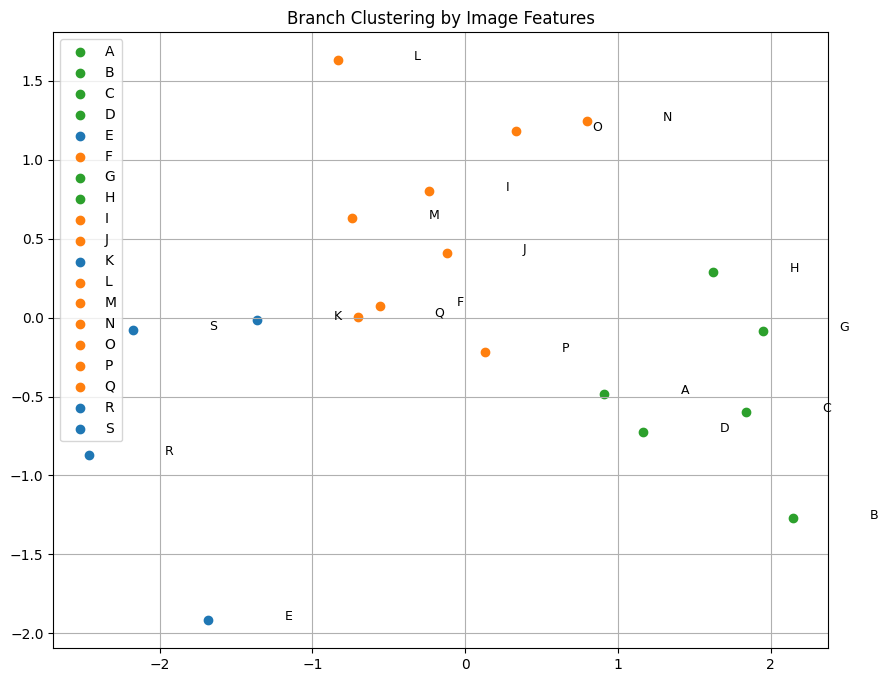

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 2차원으로 축소
pca = PCA(n_components=2)
reduced = pca.fit_transform(branch_vectors)

# 시각화
plt.figure(figsize=(10, 8))
for i, name in enumerate(branch_names):
    plt.scatter(reduced[i, 0], reduced[i, 1], label=name, c=f"C{clusters[i]}")
    plt.text(reduced[i, 0]+0.5, reduced[i, 1], name, fontsize=9)

plt.title('Branch Clustering by Image Features')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
from sklearn.metrics import silhouette_score

score = silhouette_score(branch_vectors, clusters)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.177


In [26]:
from sklearn.metrics import calinski_harabasz_score

score = calinski_harabasz_score(branch_vectors, clusters)
print(f"Calinski-Harabasz Score: {score:.2f}")


Calinski-Harabasz Score: 5.63


In [27]:
from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(branch_vectors, clusters)
print(f"Davies-Bouldin Score: {score:.3f}")


Davies-Bouldin Score: 1.542


In [28]:
from collections import defaultdict

cluster_map = defaultdict(list)
for name, label in zip(branch_names, clusters):
    cluster_map[label].append(name)

for label, names in cluster_map.items():
    print(f"Cluster {label}: {names}")


Cluster 2: ['A', 'B', 'C', 'D', 'G', 'H']
Cluster 0: ['E', 'K', 'R', 'S']
Cluster 1: ['F', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'Q']


In [29]:
# branch_names = ['A', 'B', 'C', ...]
# clusters = [0, 1, 2, ...]  # branch에 대응하는 클러스터 ID
# branch_images = {'A': [path1, path2], 'B': [path3, path4], ...}

from shutil import copyfile
import os

output_dir = "clustered_images_by_branch"
os.makedirs(output_dir, exist_ok=True)

# 클러스터별 폴더 생성
for cluster_id in set(clusters):
    os.makedirs(os.path.join(output_dir, f"cluster_{cluster_id}"), exist_ok=True)

# 브랜치 단위로 복사
for branch, cluster_id in zip(branch_names, clusters):
    for img_path in branch_images[branch]:
        dst = os.path.join(output_dir, f"cluster_{cluster_id}", os.path.basename(img_path))
        copyfile(img_path, dst)


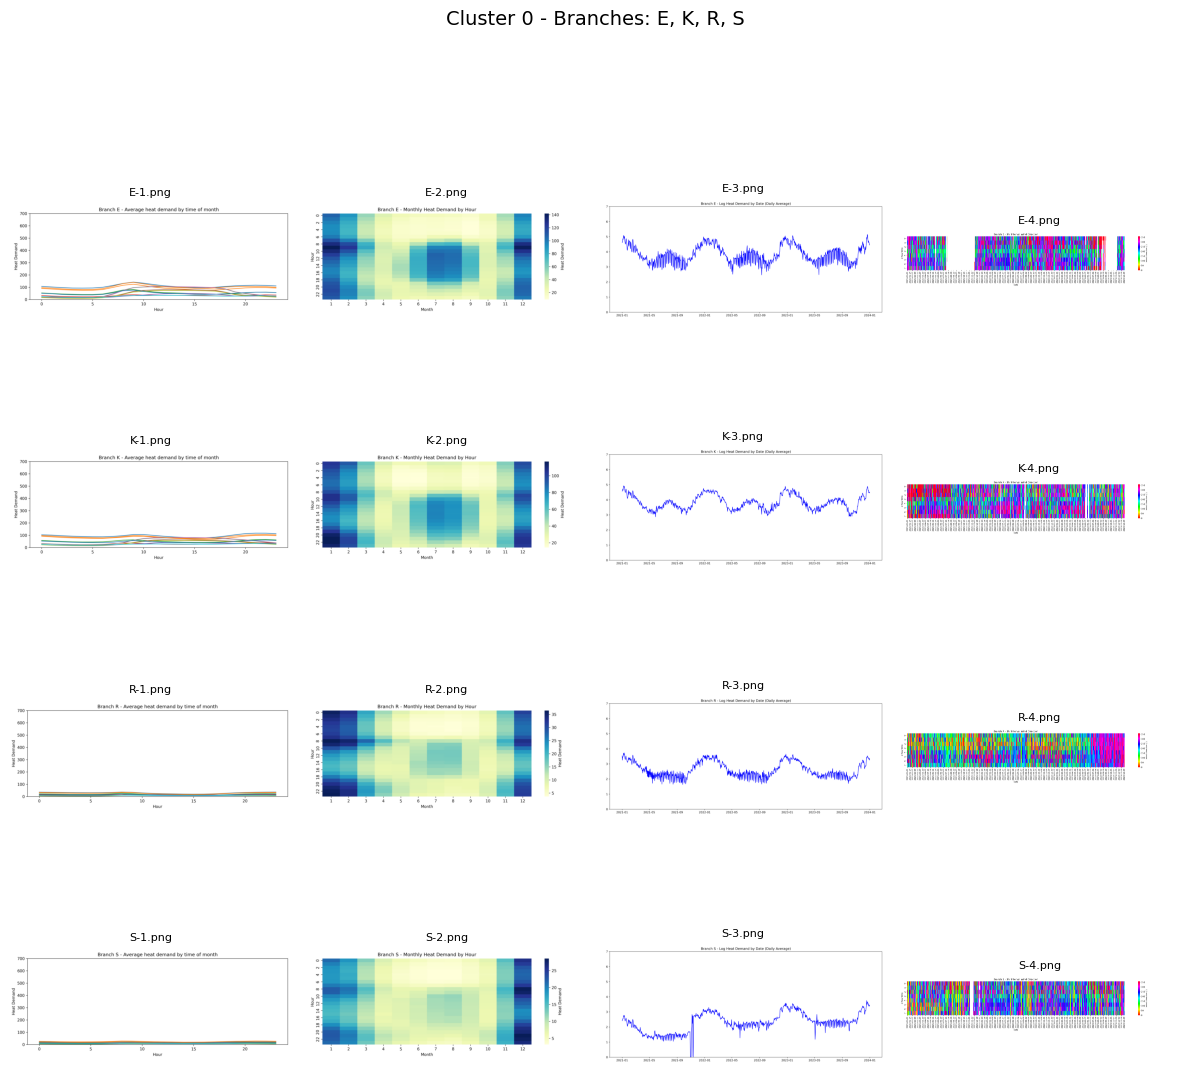

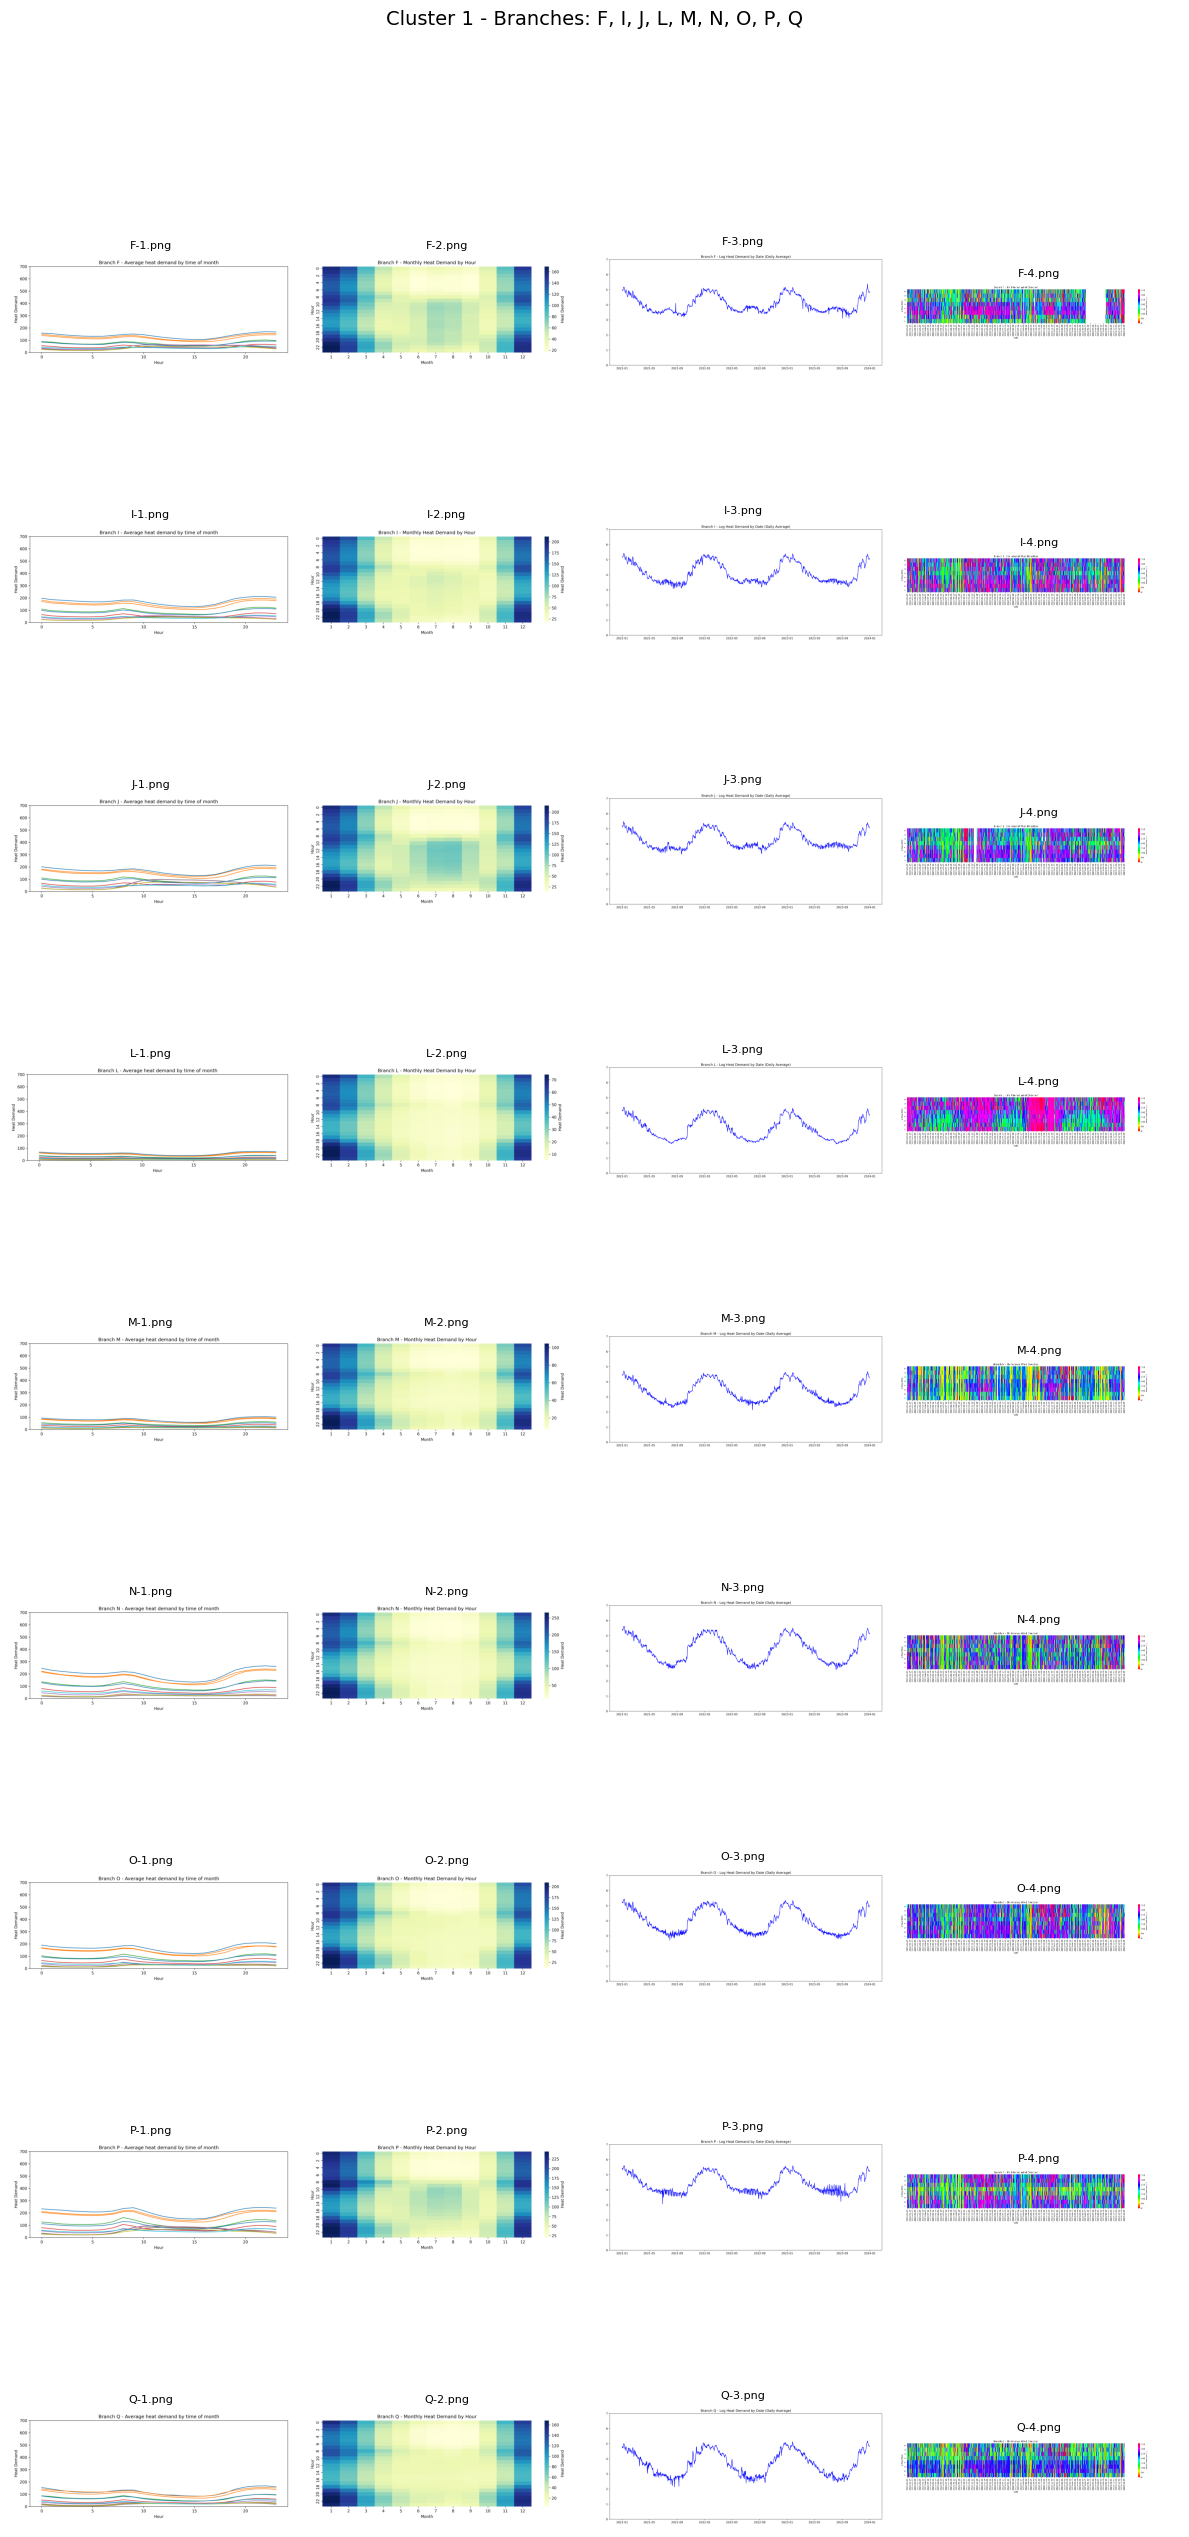

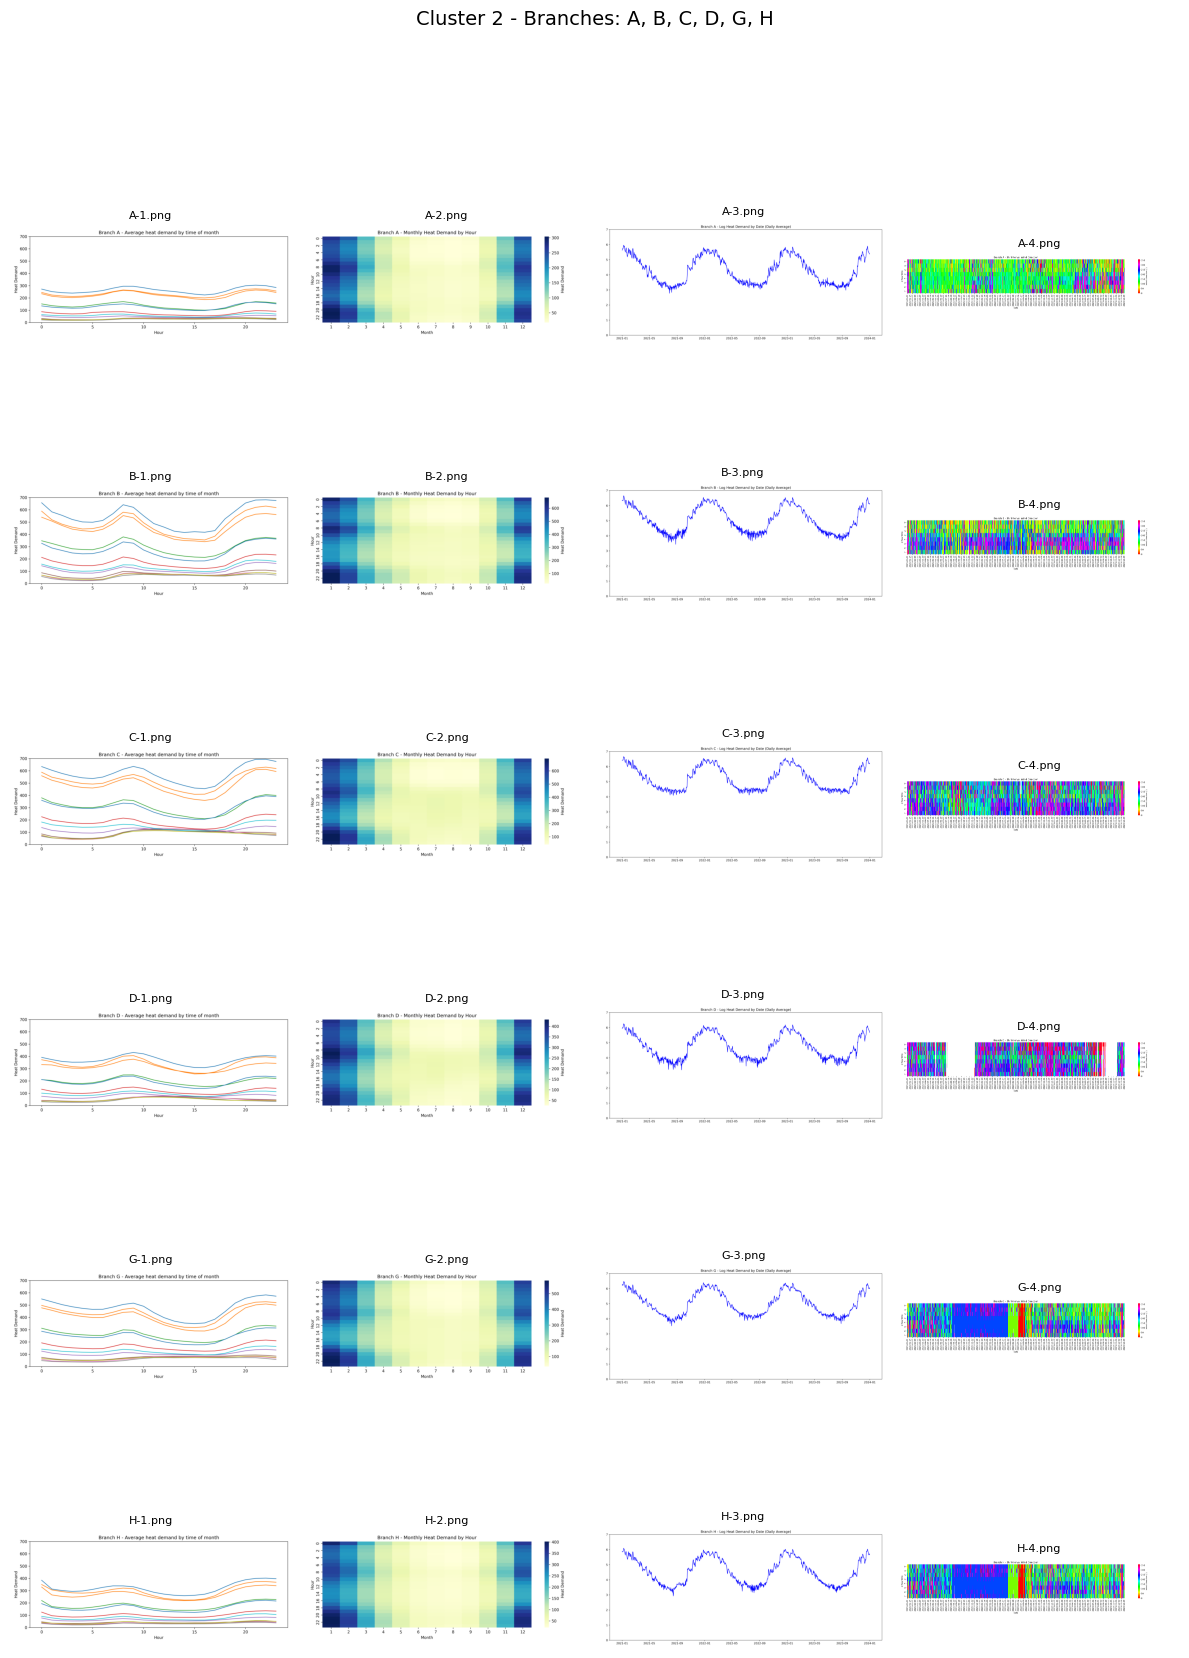

In [30]:
import matplotlib.pyplot as plt
from PIL import Image
import os

unique_clusters = sorted(set(clusters))

for cluster_id in unique_clusters:
    # 클러스터에 속한 브랜치들 찾기
    branches_in_cluster = [b for b, c in zip(branch_names, clusters) if c == cluster_id]
    branches_in_cluster = list(dict.fromkeys(branches_in_cluster))  # 중복 제거

    # 해당 브랜치들의 이미지 모으기
    images = []
    for b in branches_in_cluster:
        if b in branch_images:
            images.extend(branch_images[b])
        else:
            print(f"경고: branch_images에 '{b}' 없음")

    if not images:
        continue  # 이미지 없으면 생략

    # 한 줄에 cols개씩
    cols = 4
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(3 * cols, 3 * rows))
    plt.suptitle(f"Cluster {cluster_id} - Branches: {', '.join(branches_in_cluster)}", fontsize=14)

    for i, path in enumerate(images):
        try:
            image = Image.open(path)
            plt.subplot(rows, cols, i + 1)
            plt.imshow(image)
            plt.axis('off')
            plt.title(os.path.basename(path), fontsize=8)
        except Exception as e:
            print(f"이미지 {path} 열기 실패: {e}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목 겹침 방지
    plt.show()


In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [32]:
# branch_vectors: (브랜치 수, 2048) 형태의 numpy 배열
branch_vectors_np = np.array(branch_vectors)

# TSNE 적용 (2차원)
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
tsne_result = tsne.fit_transform(branch_vectors_np)


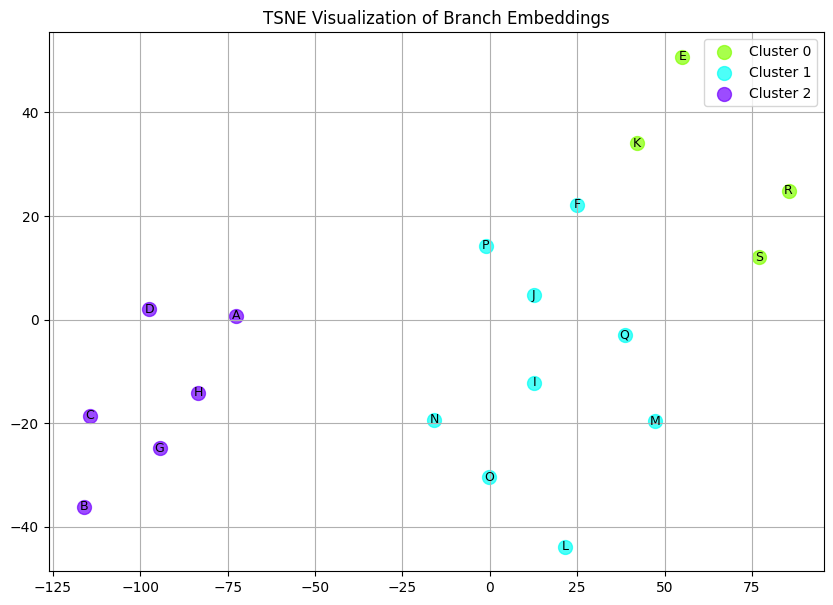

In [33]:
plt.figure(figsize=(10, 7))
palette = sns.color_palette("hsv", len(set(clusters)))

for i, label in enumerate(set(clusters)):
    indices = np.where(clusters == label)
    plt.scatter(tsne_result[indices, 0], tsne_result[indices, 1],
                label=f'Cluster {label}', s=100, alpha=0.7, color=palette[i])

# 각 포인트에 브랜치 이름 표시
for i, name in enumerate(branch_names):
    x, y = tsne_result[i]
    plt.text(x, y, name, fontsize=9, ha='center', va='center')

plt.title('TSNE Visualization of Branch Embeddings')
plt.legend()
plt.grid(True)
plt.show()
